In [1]:
%matplotlib inline
import sys, os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from pisa.core.distribution_maker import DistributionMaker
from pisa.core.map import Map

from uncertainties import unumpy

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

[ WARNING] /tmp/ipykernel_21732/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML



# Create two pipelines - one with Honda flux, one with deamonflux

In [3]:
model_daemon = DistributionMaker(["settings/pipeline/IceCube_3y_neutrinos_daemon.cfg", "settings/pipeline/IceCube_3y_muons.cfg"])
model_daemon.profile = True
model_daemon

pipeline number,name,detector name,output_binning,output_key,profile
0,neutrinos,,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","('weights', 'errors')",True
1,muons,,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","('weights', 'errors')",True


In [4]:
model_honda = DistributionMaker(["settings/pipeline/IceCube_3y_neutrinos.cfg", "settings/pipeline/IceCube_3y_muons.cfg"])
model_honda.profile = True
model_honda

pipeline number,name,detector name,output_binning,output_key,profile
0,neutrinos,,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","('weights', 'errors')",True
1,muons,,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","('weights', 'errors')",True


See that we have different parameters for different fluxes...

In [5]:
model_daemon.params.free

name,value,nominal_value,range,prior,units,is_fixed
K_158G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
K_2P,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
K_31G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
antiK_158G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
antiK_2P,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
antiK_31G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
n_158G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
n_2P,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
p_158G,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
p_2P,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False


In [6]:
model_honda.params.free

name,value,nominal_value,range,prior,units,is_fixed
nue_numu_ratio,1,1,"[0.5, 1.5]",+/- 0.05,dimensionless,False
Barr_uphor_ratio,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
Barr_nu_nubar_ratio,0,0,"[-3.0, 3.0]",+/- 1.0,dimensionless,False
delta_index,0,0,"[-0.5, 0.5]",+/- 0.1,dimensionless,False
theta13,8.5,8.5,"[7.85, 9.1]",+/- 0.205,degree,False
theta23,42.3,42.3,"[31, 59]",uniform,degree,False
deltam31,0.002457,0.002457,"[0.001, 0.007]",uniform,electron_volt ** 2,False
aeff_scale,1,1,"[0.0, 3.0]",uniform,dimensionless,False
nutau_norm,1,1,"[-1.0, 8.5]",uniform,dimensionless,False
nu_nc_norm,1,1,"[0.5, 1.5]",+/- 0.2,dimensionless,False


also check pipelines...

In [7]:
model_daemon.pipelines[0]

stage number,name,calc_mode,apply_mode,has setup,has compute,has apply,# fixed params,# free params
0,csv_loader,events,events,True,False,True,0,0
1,daemon_flux,events,events,True,True,False,1,24
2,prob3,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,True,9,3
3,aeff,events,events,False,False,True,2,3
4,hist,events,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,False,True,0,0
5,hypersurfaces,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,True,True,0,5


In [8]:
model_honda.pipelines[0]

stage number,name,calc_mode,apply_mode,has setup,has compute,has apply,# fixed params,# free params
0,csv_loader,events,events,True,False,True,0,0
1,honda_ip,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,False,1,0
2,barr_simple,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,False,1,4
3,prob3,"""true_allsky_fine"": 200 (true_energy) x 200 (true_coszen)",events,True,True,True,9,3
4,aeff,events,events,False,False,True,2,3
5,hist,events,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,False,True,0,0
6,hypersurfaces,"""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)","""dragon_datarelease"": 8 (reco_energy) x 8 (reco_coszen) x 2 (pid)",True,True,True,0,5


# Get neutrino maps and compare

In [9]:
maps_daemon = model_daemon.pipelines[0].get_outputs()
maps_honda = model_honda.pipelines[0].get_outputs()

[ WARNING] /mnt/ceph1-npx/user/mliubarska/osc/pisa_osc/pisa/stages/flux/daemon_flux.py:203: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "make_2d_flux_map" failed type inference due to: non-precise type pyobject
During: typing of argument at /mnt/ceph1-npx/user/mliubarska/osc/pisa_osc/pisa/stages/flux/daemon_flux.py (218)

File "../pisa/stages/flux/daemon_flux.py", line 218:
def make_2d_flux_map(flux_obj,
    <source elided>

    for index in range(len(icangles)):
    ^

  @jit(forceobj=True)



In [10]:
maps_daemon.names

['nue_cc',
 'numu_cc',
 'nutau_cc',
 'nue_nc',
 'numu_nc',
 'nutau_nc',
 'nuebar_cc',
 'numubar_cc',
 'nutaubar_cc',
 'nuebar_nc',
 'numubar_nc',
 'nutaubar_nc']

first check maps by neutrino types

In [11]:
def plt_maps(maps, title=None):
    fig, axes = plt.subplots(3,4, figsize=(24,10))
    plt.suptitle(title)
    plt.subplots_adjust(hspace=0.5)
    axes = axes.flatten()

    for m, ax in zip(maps, axes):
        m.plot(ax=ax)

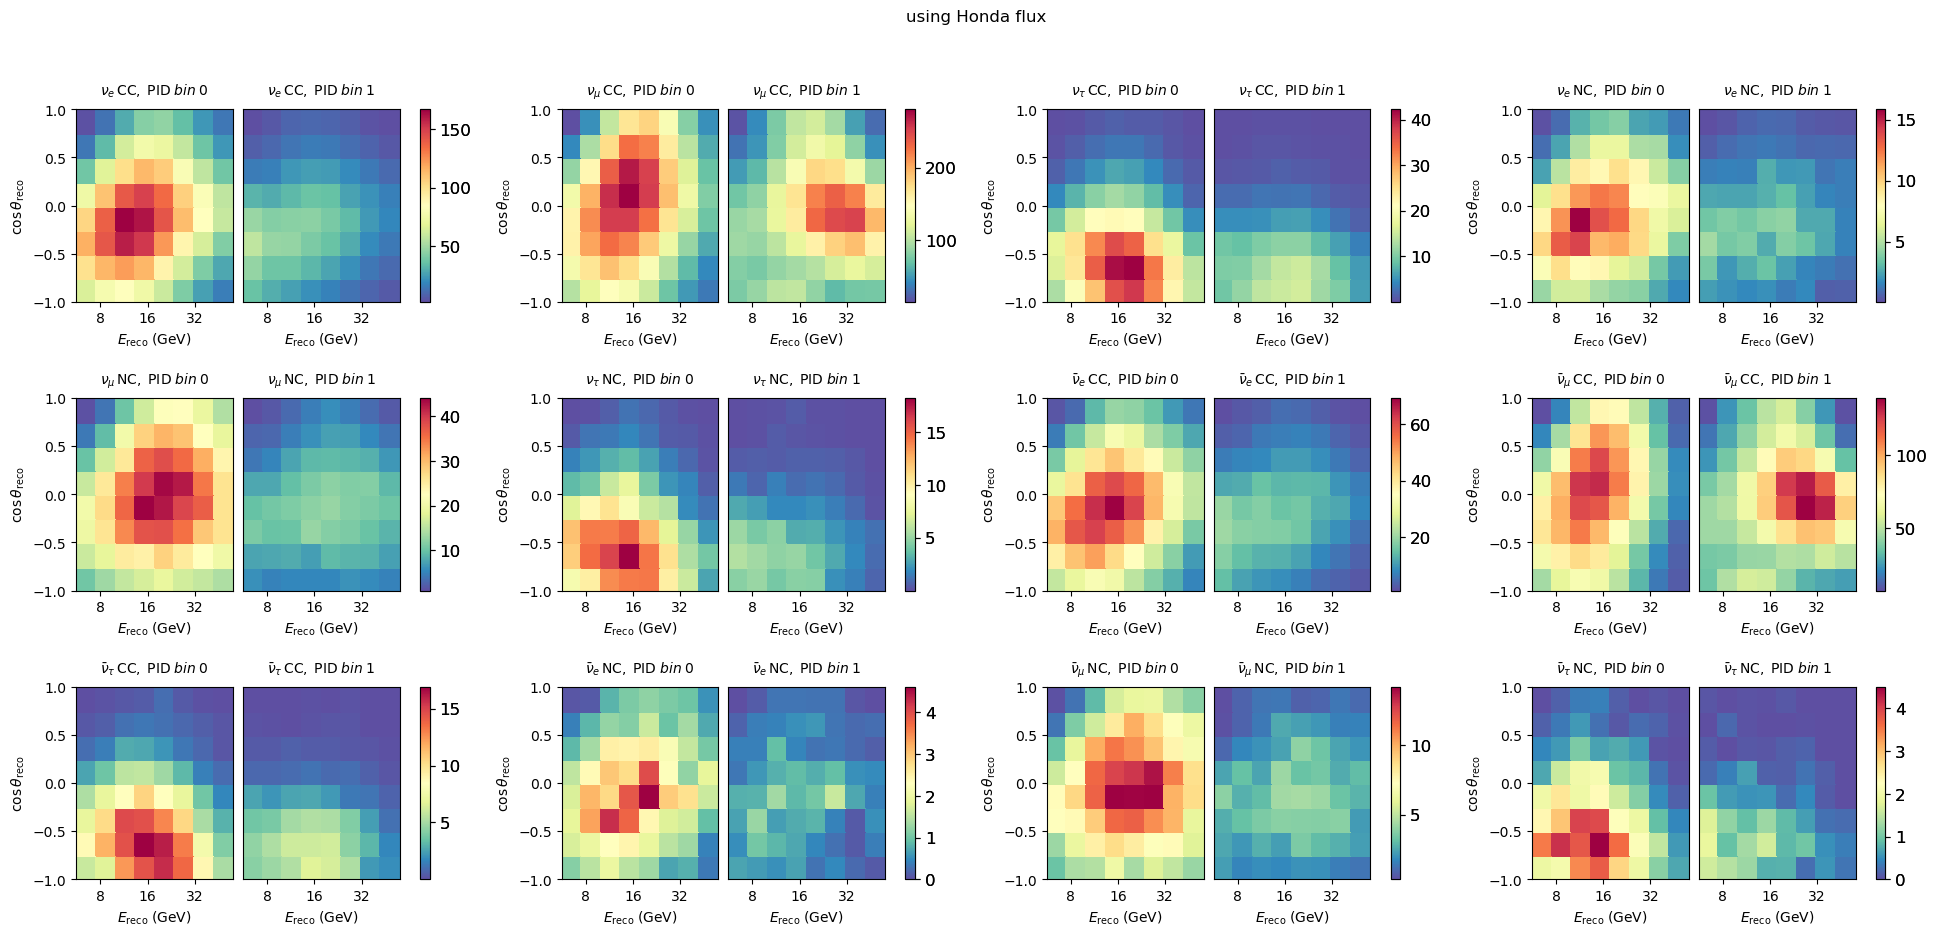

In [12]:
plt_maps(maps_honda, 'using Honda flux')

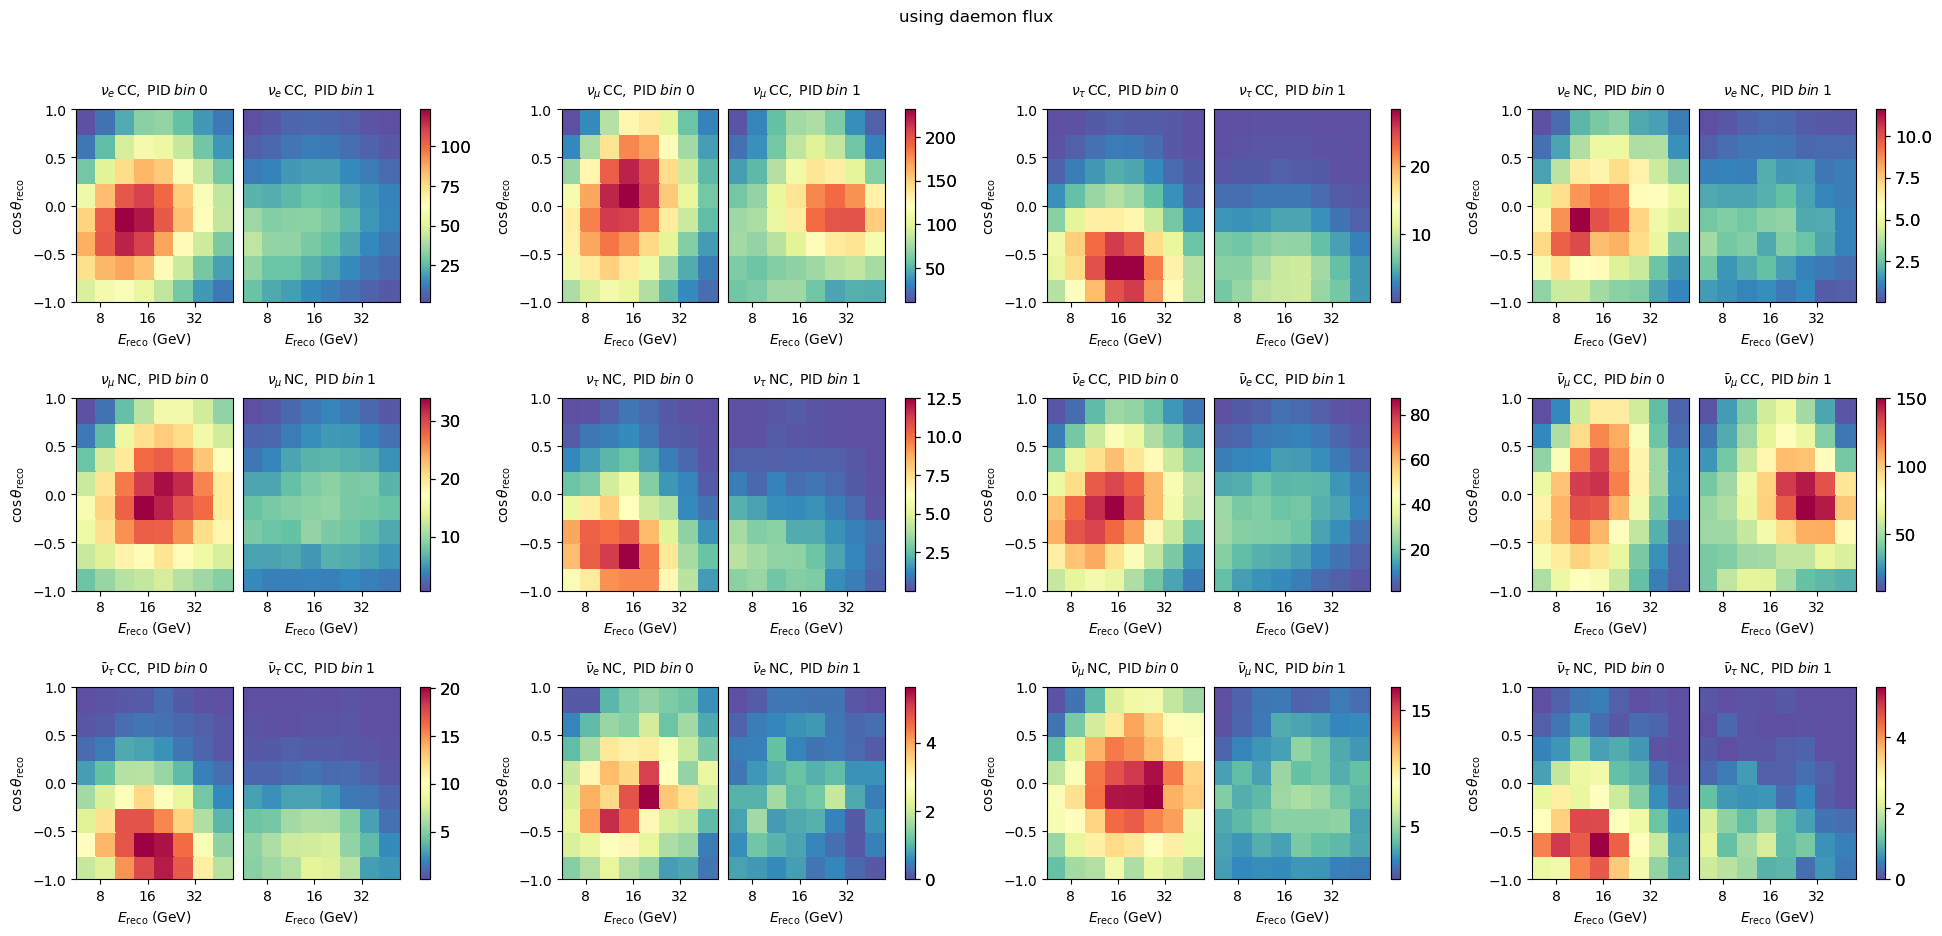

In [13]:
plt_maps(maps_daemon, 'using daemon flux')

now look at combined maps

In [14]:
map_tot_daemon = model_daemon.get_outputs(return_sum=True)
map_tot_honda = model_honda.get_outputs(return_sum=True)

Text(0.5, 1.02, 'Honda flux')

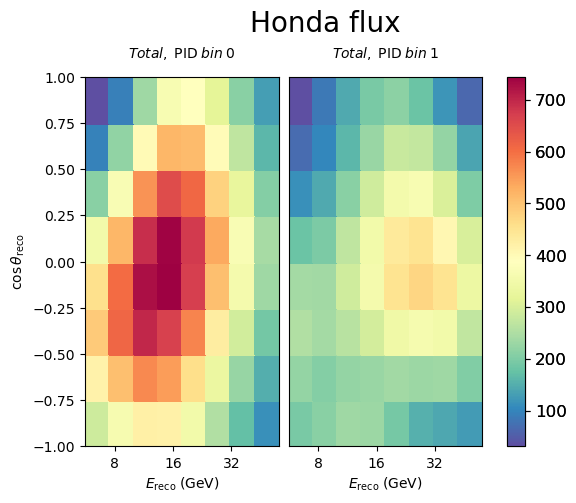

In [15]:
map_tot_honda.plot()
plt.suptitle('Honda flux', fontsize=20, y=1.02)

Text(0.5, 1.02, 'daemon flux')

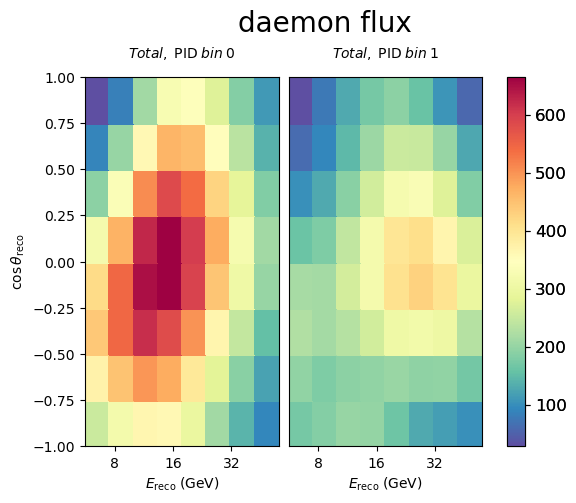

In [16]:
map_tot_daemon.plot()
plt.suptitle('daemon flux', fontsize=20, y=1.02)

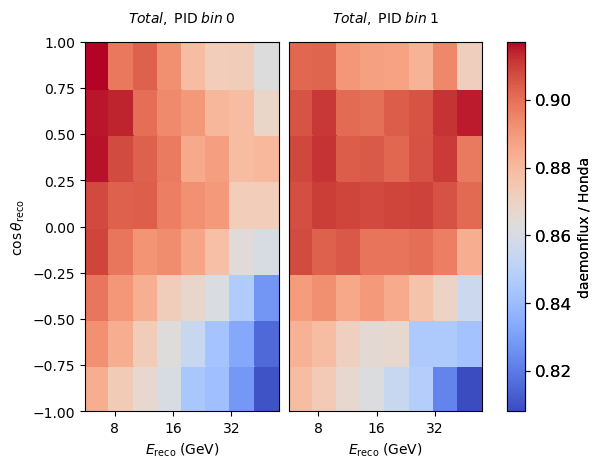

In [17]:
# ratio daemon/honda
(map_tot_daemon/map_tot_honda).plot(cmap='coolwarm', clabel='daemonflux / Honda')

# check we get a change when pulling each of parameters by 1 sigma

In [18]:
def plot_modif_to_map(model):

    model.reset_free()
    nominal = model.get_outputs(return_sum=True)
    for i, p in enumerate(model.params.free):
        if p.prior.kind == 'uniform': continue
        # reset all free parameters to put them back to nominal values
        model.reset_free()

        # shift one parameter
        p.value = p.nominal_value + p.prior.stddev
        sys = model.get_outputs(return_sum=True)

        ((nominal[0] - sys[0])/nominal[0]).plot(cmap='coolwarm', clabel="rel. difference")
        plt.suptitle(p.name+r'$+1\sigma$', fontsize=20, y=1.02)
    return

[ WARNING] /mnt/ceph1-npx/user/mliubarska/osc/pisa_osc/pisa/core/map.py:708: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)



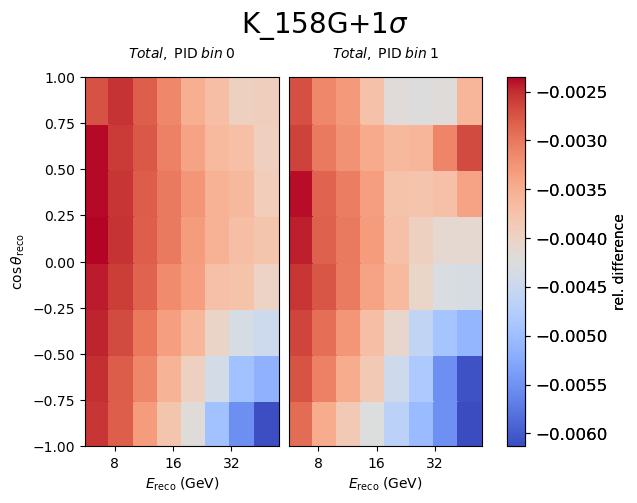

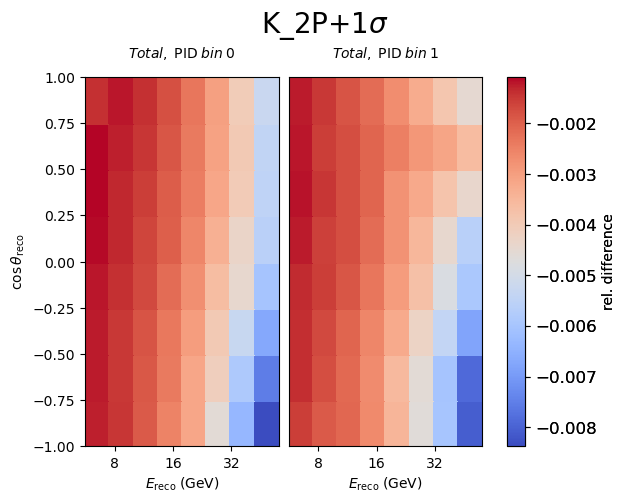

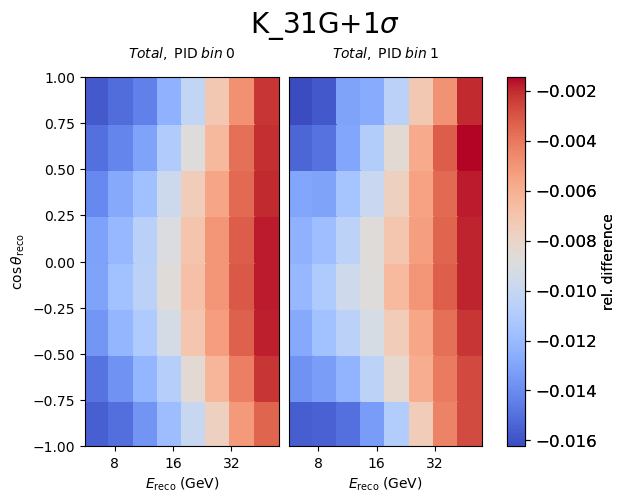

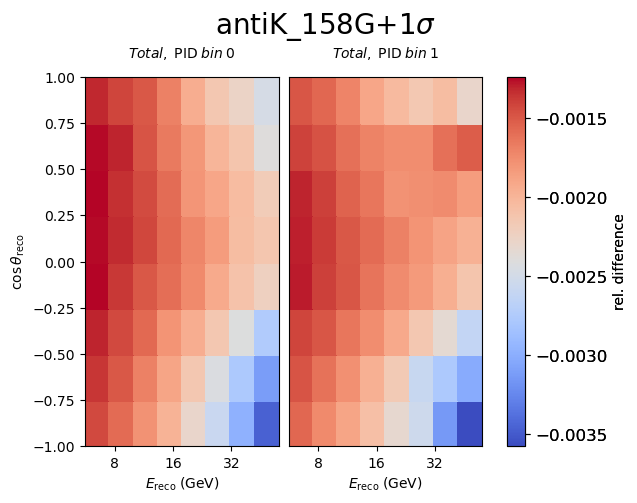

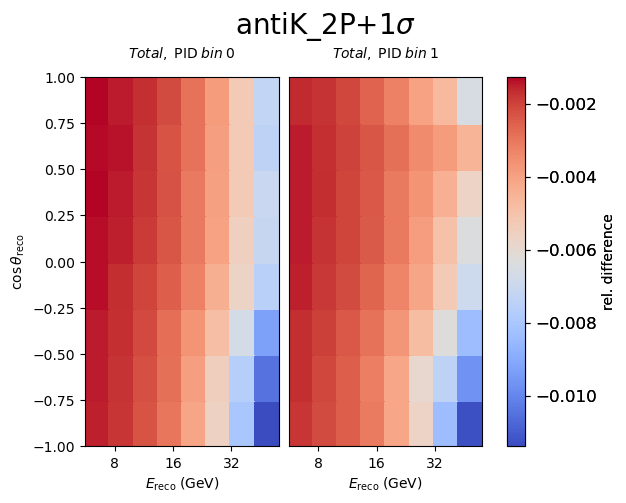

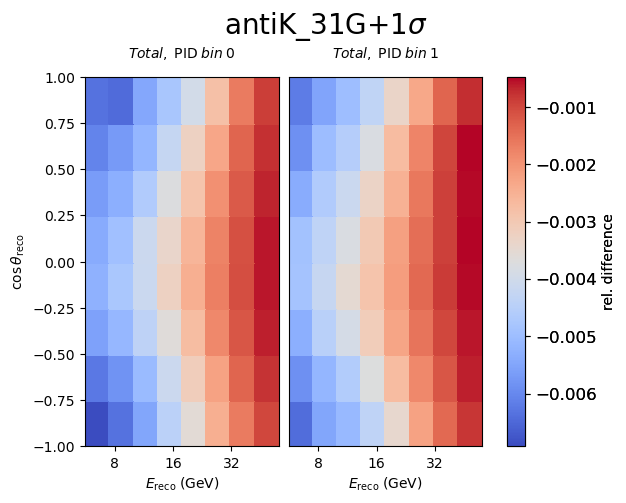

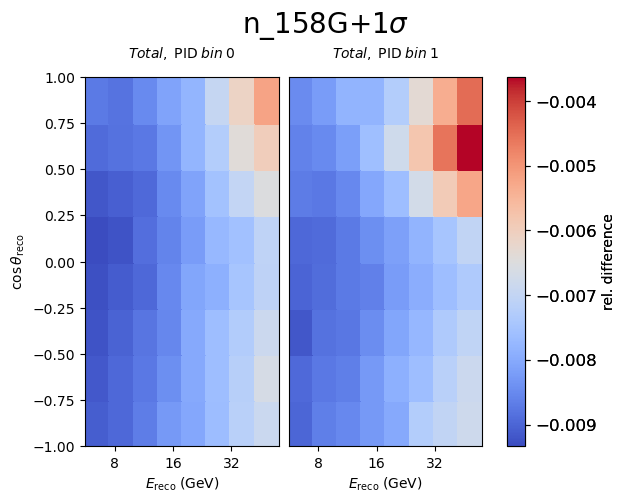

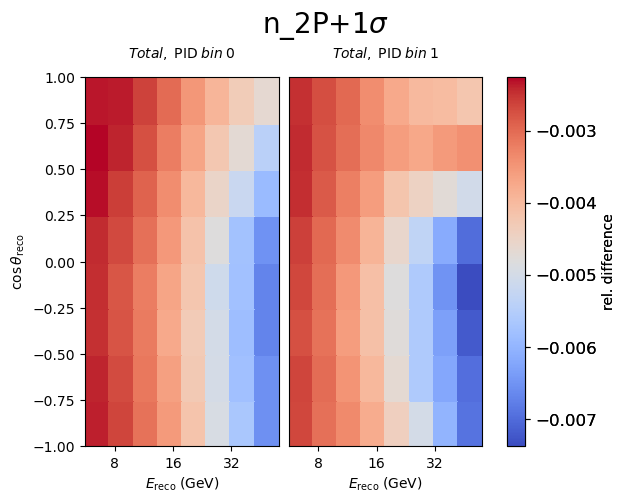

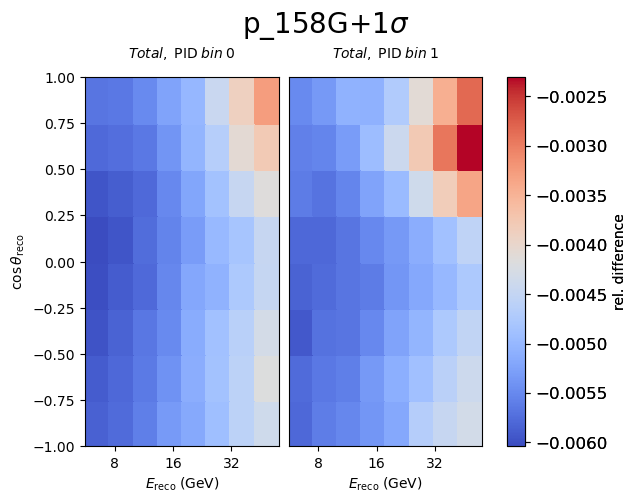

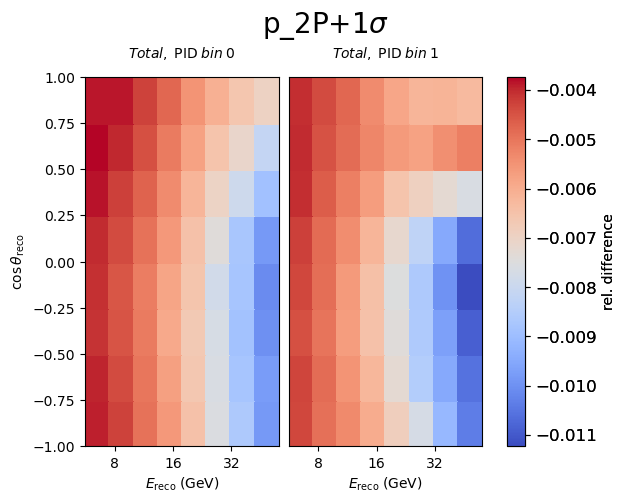

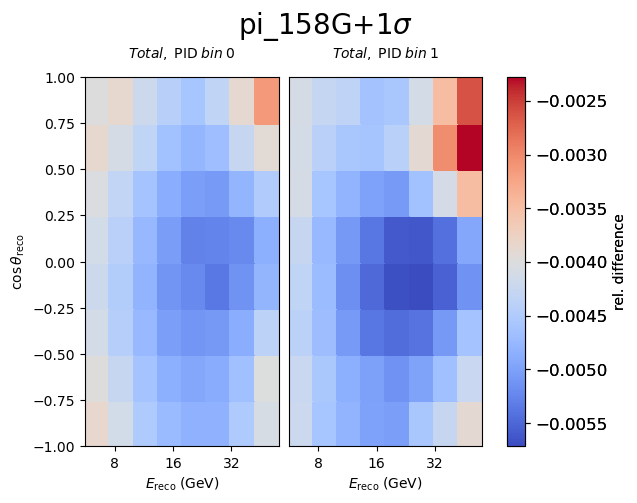

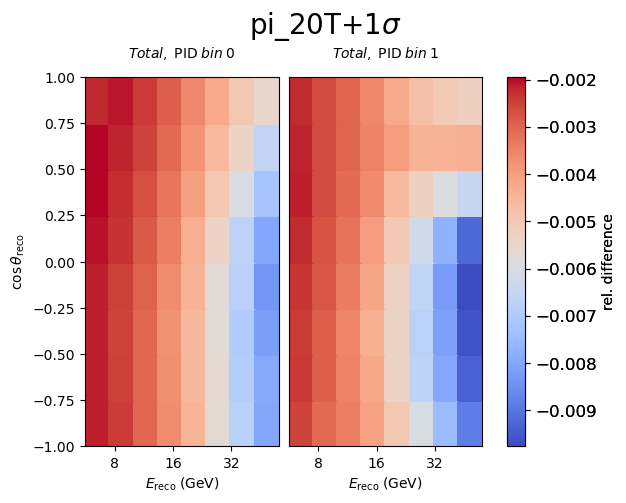

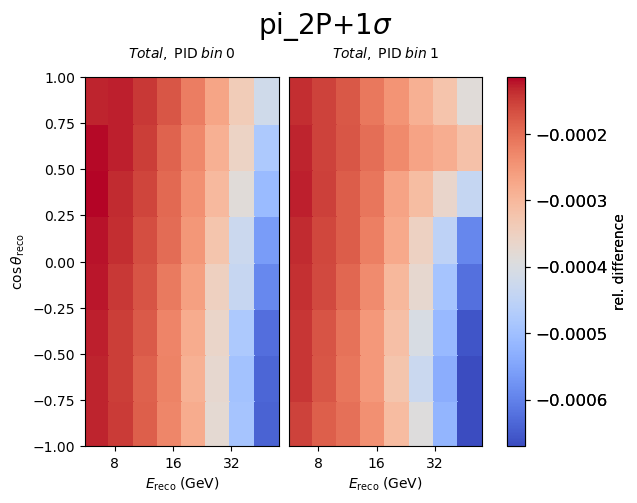

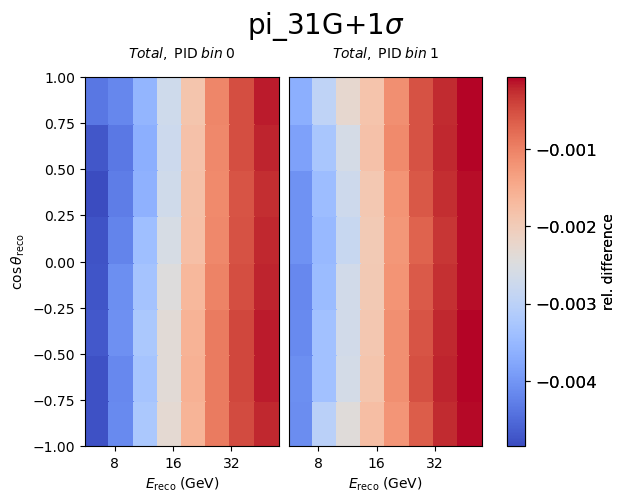

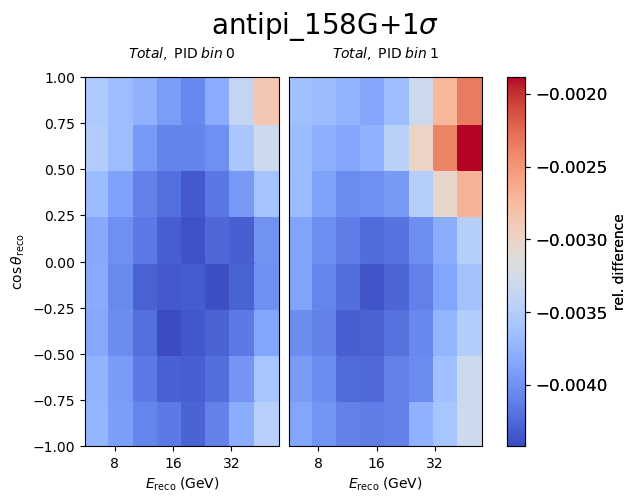

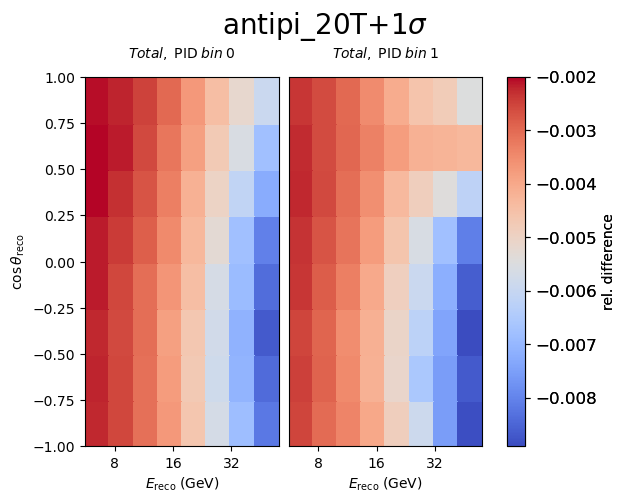

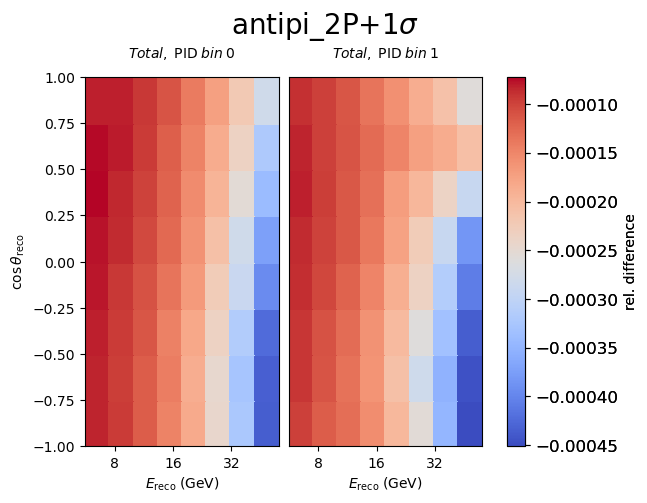

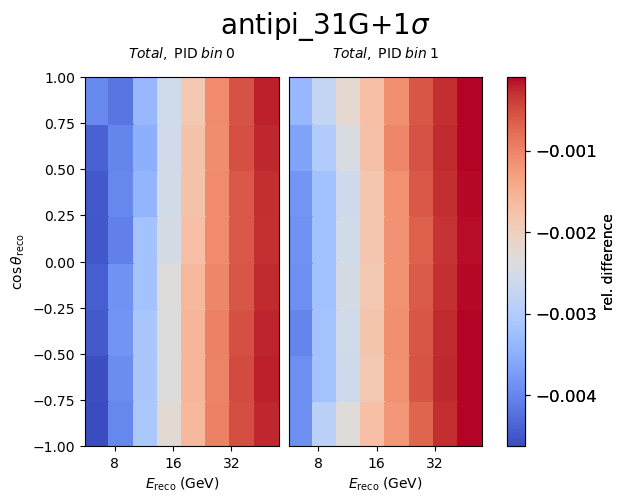

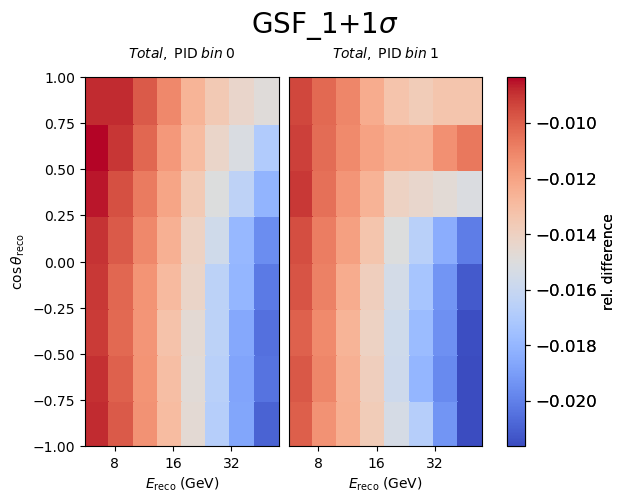

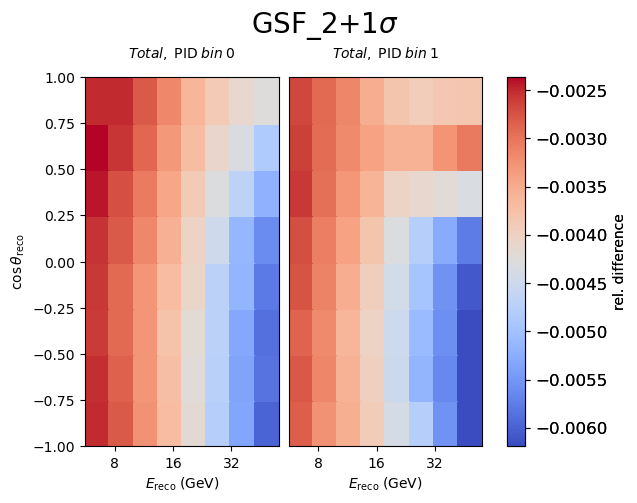

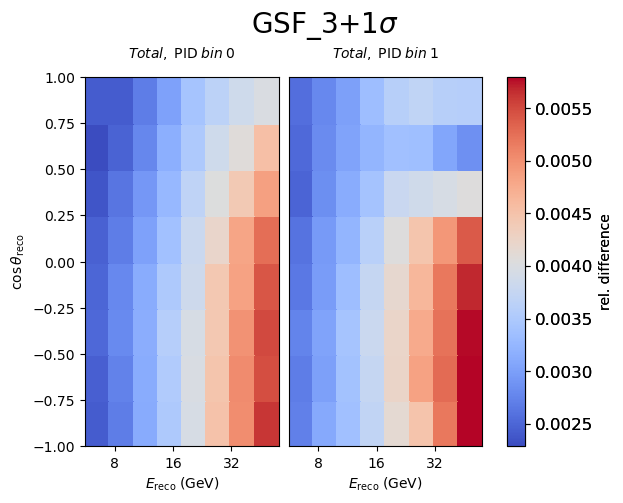

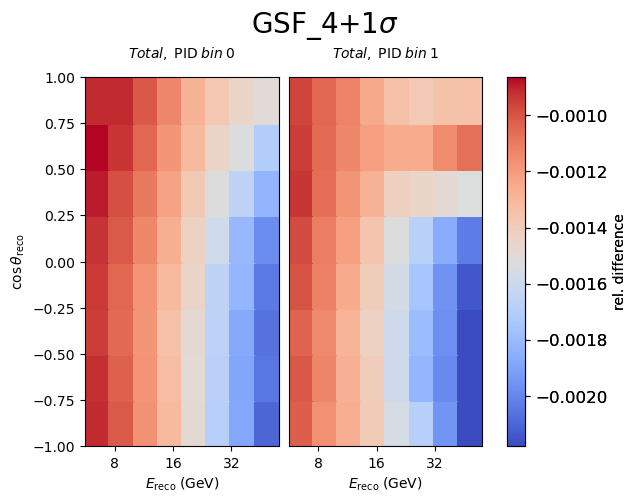

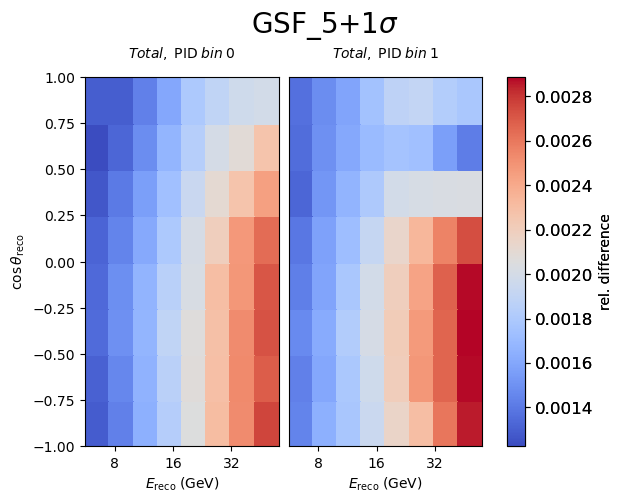

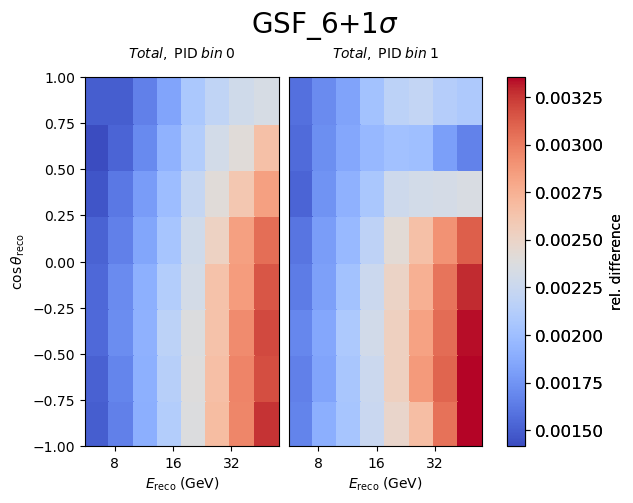

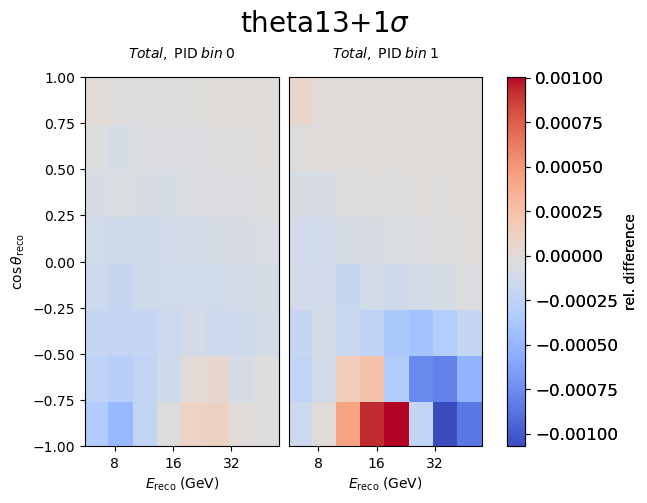

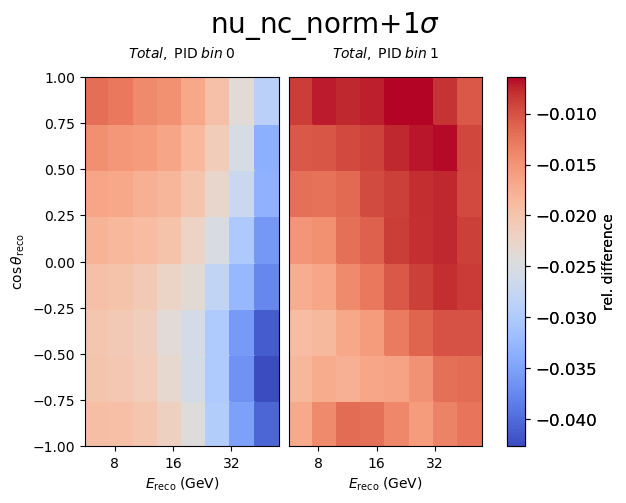

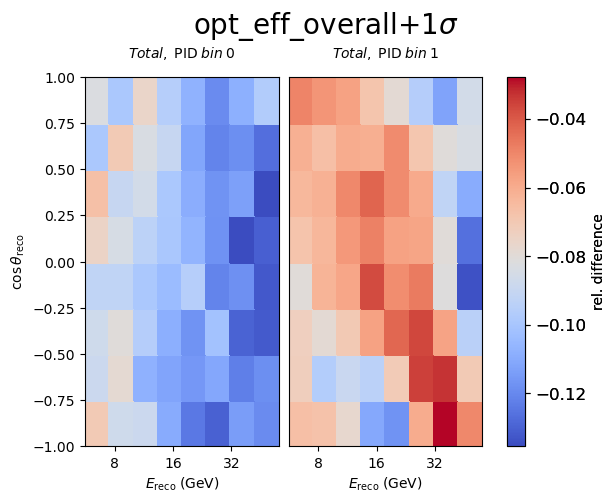

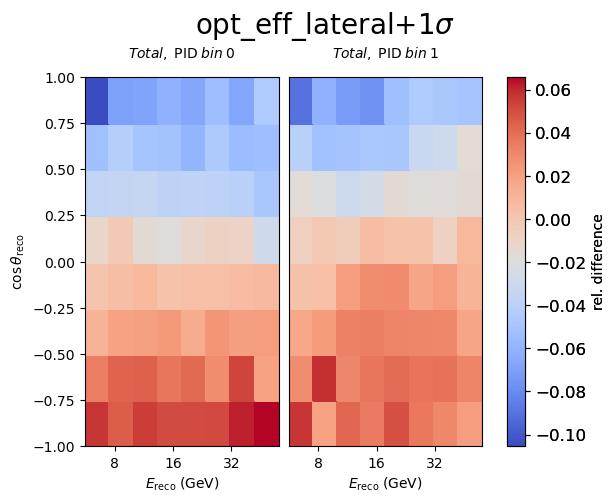

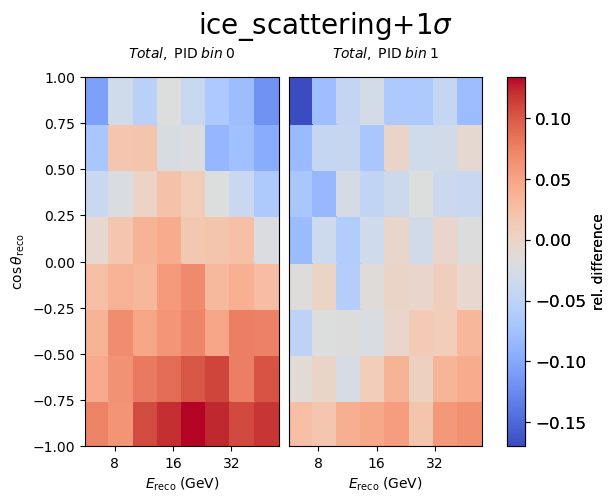

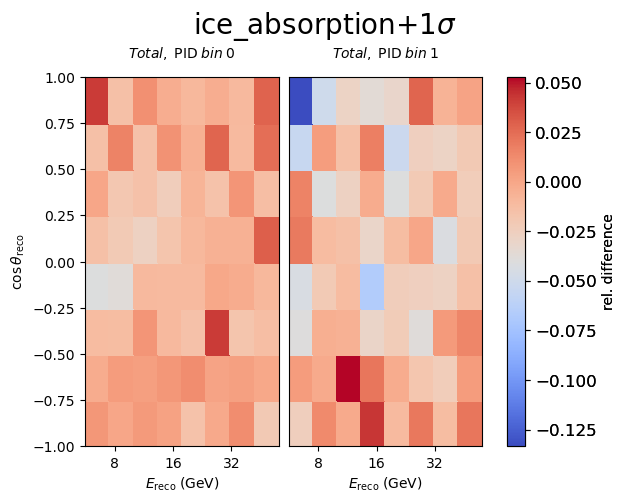

In [19]:
plot_modif_to_map(model_daemon)

# check penalty term calculation w/ covariance

In [20]:
def test_penalty(model):
    model.reset_free()
    nominal = model.get_outputs(return_sum=True)
    for i, p in enumerate(model.params.free):
        if p.prior.kind == 'uniform': continue
        # reset all free parameters to put them back to nominal values
        model.reset_free()

        # shift one parameter
        p.value = p.nominal_value + p.prior.stddev
        # have to run compute method for chi2 to get updated
        sys = model.get_outputs(return_sum=True)

        penalty = model.params.priors_penalty(metric='mod_chi2')
        print('pulling '+p.name+r' by +1 sigma -> prior penalty =', penalty)
    return

if the covariance term wasn't added, the prior penalty would be 1 (1 sigma pull for 1 parameter)

In [21]:
test_penalty(model_daemon)

pulling K_158G by +1 sigma -> prior penalty = 20.669470253089415
pulling K_2P by +1 sigma -> prior penalty = 814.8682652834151
pulling K_31G by +1 sigma -> prior penalty = 4.782145410066016
pulling antiK_158G by +1 sigma -> prior penalty = 5.167670432052521
pulling antiK_2P by +1 sigma -> prior penalty = 1031.8517781662042
pulling antiK_31G by +1 sigma -> prior penalty = 1.3990423733149342
pulling n_158G by +1 sigma -> prior penalty = 14.836491989253512
pulling n_2P by +1 sigma -> prior penalty = 25.899890686262935
pulling p_158G by +1 sigma -> prior penalty = 4.462573122251503
pulling p_2P by +1 sigma -> prior penalty = 5.483267988092043
pulling pi_158G by +1 sigma -> prior penalty = 11.911597541052451
pulling pi_20T by +1 sigma -> prior penalty = 502.47445811371983
pulling pi_2P by +1 sigma -> prior penalty = 6.576411765989332
pulling pi_31G by +1 sigma -> prior penalty = 4.444786009326371
pulling antipi_158G by +1 sigma -> prior penalty = 12.221933008589437
pulling antipi_20T by +1 